In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [51]:
df = pd.read_csv(r"C:\Users\user\Downloads\Iranian churn\Customer Churn.csv")

In [52]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

# Import Data

In [53]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


# Data Exploration (EDA)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [55]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


## observation

In [56]:
for i in df.columns:
    if df[i].dtype=="float":
        print(df[i].value_counts())
        print("THE COLUMNS",df[i])
        print("\n")

Customer Value
0.000      132
45.495      11
40.440      10
15.165       6
25.275       5
          ... 
12.600       1
59.925       1
829.845      1
815.535      1
135.600      1
Name: count, Length: 2654, dtype: int64
THE COLUMNS 0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3145     721.980
3146     261.210
3147     280.320
3148    1077.640
3149     100.680
Name: Customer Value, Length: 3150, dtype: float64




In [57]:
df["Call  Failure"].value_counts()

Call  Failure
0     702
5     244
7     166
6     161
8     156
9     149
3     141
2     137
4     133
11    125
10    124
1     121
13     99
12     97
14     85
15     69
16     67
18     53
17     45
20     37
19     33
21     29
23     25
25     21
22     21
26     17
28     17
24     16
30     16
27     13
32      8
29      7
31      6
33      3
34      3
35      2
36      2
Name: count, dtype: int64

In [58]:
df["Call  Failure"].unique()

array([ 8,  0, 10,  3, 11,  4, 13,  7,  6,  9, 25,  2, 23, 21,  1, 16, 12,
       14, 28,  5, 26, 24, 19, 15, 22, 20, 18, 17, 30, 27, 29, 31, 33, 35,
       32, 34, 36])

In [59]:
df["Complains"].value_counts()

Complains
0    2909
1     241
Name: count, dtype: int64

In [60]:
df["Subscription  Length"].value_counts()

Subscription  Length
36    276
38    258
37    229
35    228
39    201
34    201
40    186
33    152
32    121
41    110
31    104
42     80
30     80
29     73
28     59
27     57
43     56
25     52
26     45
44     44
24     41
23     39
17     32
18     31
15     31
16     30
19     29
20     28
11     26
22     26
21     25
14     25
13     24
45     23
9      22
7      19
12     19
10     16
46     13
8      12
6       8
3       8
5       6
4       4
47      1
Name: count, dtype: int64

In [61]:
df["Charge  Amount"].value_counts()

Charge  Amount
0     1768
1      617
2      395
3      199
4       76
5       30
8       19
9       14
7       14
6       11
10       7
Name: count, dtype: int64

In [62]:
df["Seconds of Use"].value_counts()

Seconds of Use
0        154
305       37
710        9
2088       9
1015       9
        ... 
13368      1
1833       1
14735      1
2690       1
6095       1
Name: count, Length: 1756, dtype: int64

In [63]:
df["Frequency of use"].value_counts()

Frequency of use
0      154
6       49
44      38
39      37
41      35
      ... 
196      1
189      1
245      1
199      1
255      1
Name: count, Length: 242, dtype: int64

In [64]:
df["Frequency of SMS"].value_counts()

Frequency of SMS
0      603
7      194
9       54
8       54
15      54
      ... 
396      1
495      1
156      1
297      1
371      1
Name: count, Length: 405, dtype: int64

In [65]:
df["Distinct Called Numbers"].value_counts()

Distinct Called Numbers
0     154
2      88
10     78
15     77
17     76
     ... 
95      1
93      1
88      1
87      1
97      1
Name: count, Length: 92, dtype: int64

In [66]:
df["Age Group"].value_counts()

Age Group
3    1425
2    1037
4     395
5     170
1     123
Name: count, dtype: int64

In [67]:
df["Status"].value_counts()

Status
1    2368
2     782
Name: count, dtype: int64

In [68]:
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [69]:
df["Tariff Plan"].value_counts()

Tariff Plan
1    2905
2     245
Name: count, dtype: int64

In [70]:
df["Age"].value_counts()

Age
30    1425
25    1037
45     395
55     170
15     123
Name: count, dtype: int64

In [71]:
df["Customer Value"].value_counts()

Customer Value
0.000      132
45.495      11
40.440      10
15.165       6
25.275       5
          ... 
12.600       1
59.925       1
829.845      1
815.535      1
135.600      1
Name: count, Length: 2654, dtype: int64

In [72]:
df["Churn"].value_counts()

Churn
0    2655
1     495
Name: count, dtype: int64

In [73]:
df["Customer Value"].unique

<bound method Series.unique of 0        197.640
1         46.035
2       1536.520
3        240.020
4        145.805
          ...   
3145     721.980
3146     261.210
3147     280.320
3148    1077.640
3149     100.680
Name: Customer Value, Length: 3150, dtype: float64>

In [74]:
Ag_co = df.groupby(["Age Group","Complains"])["Tariff Plan"].count().unstack()

<Axes: xlabel='Age Group'>

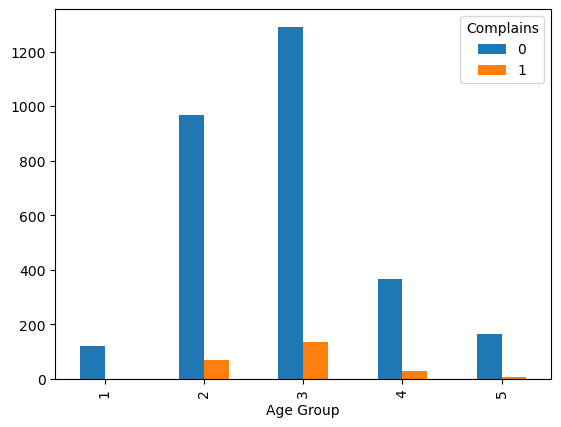

In [75]:
Ag_co.plot(kind="bar")

In [76]:
Ag_co 

Complains,0,1
Age Group,,
1,122,1
2,968,69
3,1291,134
4,365,30
5,163,7


In [77]:
Tar_p = df.groupby("Age Group")["Tariff Plan"].value_counts().unstack()
Tar_p

Tariff Plan,1,2
Age Group,,
1,96,27
2,901,136
3,1363,62
4,389,6
5,156,14


<Axes: ylabel='Age Group'>

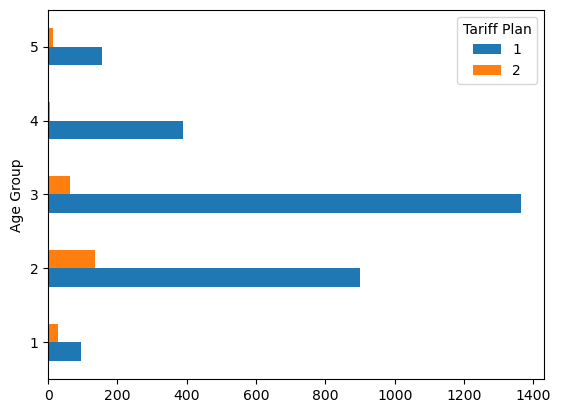

In [78]:
Tar_p.plot(kind="barh")

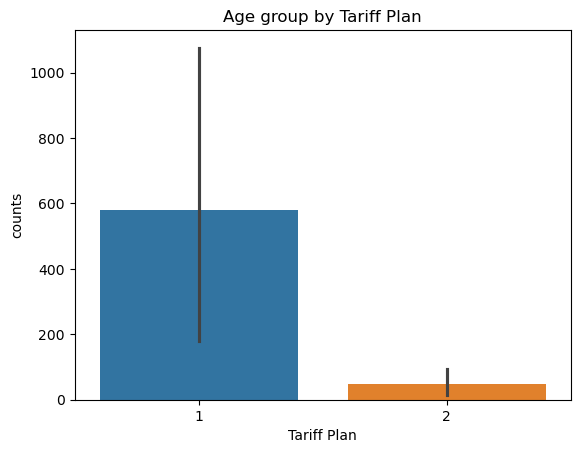

In [79]:
sns.barplot(data=Tar_p)

plt.title("Age group by Tariff Plan")
plt.xlabel("Tariff Plan")
plt.ylabel("counts")
plt.show()

In [80]:
# counts = Sta_CF.value_counts(normalize=True)
# counts

<Axes: ylabel='Call  Failure'>

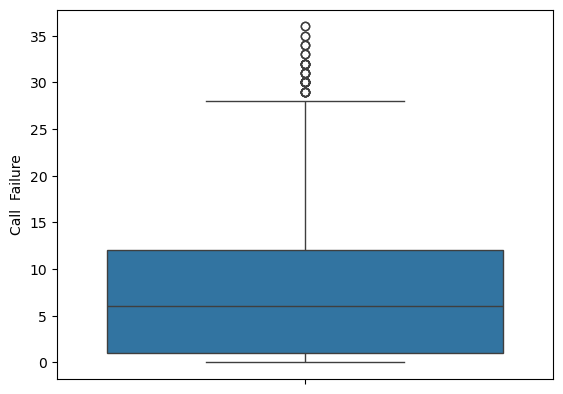

In [81]:
sns.boxplot(df["Call  Failure"])


# Data cleaning

In [82]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [83]:
df_drop = df.drop(["Age"], axis=1)

In [84]:
df_drop

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,1,721.980,0
3146,17,0,17,1,9237,177,80,42,5,1,1,261.210,0
3147,13,0,18,4,3157,51,38,21,3,1,1,280.320,0
3148,7,0,11,2,4695,46,222,12,3,1,1,1077.640,0


In [85]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Customer Value           3150 non-null   float64
 12  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 320.1 KB


In [86]:
X = df_drop.drop("Churn", axis=1)   # features
y = df_drop["Churn"]               # labels

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
X_train.head()
len(X_train)

2520

In [89]:
X_test.head()
len(X_test)

630

In [90]:
y_train.head()
len(y_train)

2520

In [91]:
y_test.head()
len(y_test)

630

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=500))
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('logisticregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [93]:
from sklearn.metrics import accuracy_score

# Make predictions and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.8698


In [97]:
# import xgboost as xgb

In [98]:
# xgb_class = xgb.XGBClassifier(objective='binary:logistic',  # For binary classification
#                         n_estimators=100,
#                         learning_rate=0.1,
#                         max_depth=3,
#                         use_label_encoder=False, # Suppress warning, set to True if needed for older versions
#                         eval_metric='logloss') # Evaluation metric for classification

# # Fit the model
# xgb_class.fit(X_train, y_train)

# # Make predictions
# y_pred = xgb_class.predict(X_test)

# # Evaluate the model (e.g., using accuracy score)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Define the model
xgb_class = xgb.XGBClassifier(
    objective='binary:logistic',  # For binary classification
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    eval_metric='logloss'  # Evaluation metric for classification
)

# Fit the model
xgb_class.fit(X_train, y_train)

# Make predictions
y_pred = xgb_class.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9270


In [100]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[504  16]
 [ 30  80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       520
           1       0.83      0.73      0.78       110

    accuracy                           0.93       630
   macro avg       0.89      0.85      0.87       630
weighted avg       0.92      0.93      0.92       630

